<a href="https://colab.research.google.com/github/Johndola58/Johndola58/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [11]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_loyalty_data.csv") 

In [12]:
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Income                   1000 non-null   int64 
 2   Num_Purchases            1000 non-null   int64 
 3   Average_Rating           1000 non-null   int64 
 4   Customer_Service_Rating  1000 non-null   int64 
 5   Membership_Duration      1000 non-null   int64 
 6   Loyalty                  1000 non-null   object
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None 

   Age  Income  Num_Purchases  Average_Rating  Customer_Service_Rating  \
0   63    4528              1               1                        2   
1   20    2482             14               1                        5   
2   46    1316              1               4                        4   
3   52    3024              4               4                   

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('Loyalty', axis=1), df['Loyalty'], test_size=0.2, random_state=50)

In [14]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
classifier = svm.SVC()

In [16]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

In [17]:
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

In [18]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

SVC(C=0.01, gamma=0.01, kernel='linear') 



In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  89]
 [  0 111]]
              precision    recall  f1-score   support

       Loyal       0.00      0.00      0.00        89
   Non-Loyal       0.56      1.00      0.71       111

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.31      0.56      0.40       200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

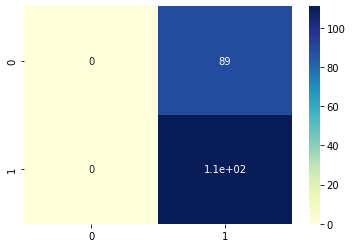

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

Age                        0.000224
Income                     0.000134
Num_Purchases              0.000296
Average_Rating             0.070000
Customer_Service_Rating    0.000063
Membership_Duration        0.000169
dtype: float64 

Age                        0.000224
Income                     0.000134
Num_Purchases              0.000296
Average_Rating             0.070000
Customer_Service_Rating    0.000063
Membership_Duration        0.000169
dtype: float64 



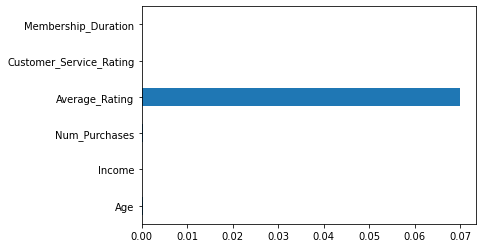

In [21]:
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show()

[[2.24378308e-04 1.33690232e-04 2.95565063e-04 7.00000000e-02
  6.28093949e-05 1.68657906e-04]] 

[[2.24378308e-04 1.33690232e-04 2.95565063e-04 7.00000000e-02
  6.28093949e-05 1.68657906e-04]] 



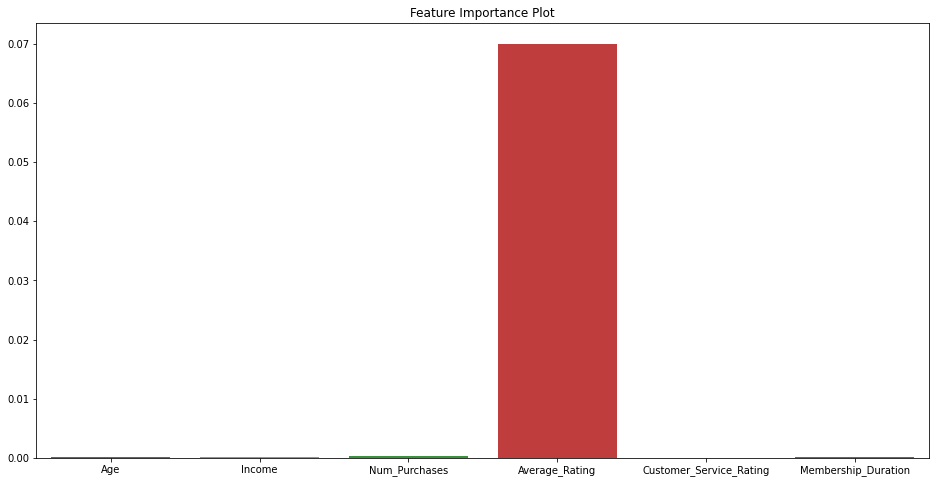

In [22]:
# Print the coefficients of the hyperplane
coefficients = best_classifier.coef_
print(coefficients,'\n')
coefficients = abs(coefficients)
print(coefficients,'\n')
# Display the coefficients
#import matplotlib.pyplot as plt
#%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=X_train.columns, y=coefficients.reshape(-1))
ax.set_title("Feature Importance Plot")
plt.show()